In [403]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from ast import literal_eval

import datetime

## Part 1. Aggregated data exploration

Import total traffic per day (clicks, impressions).  
Answering the question of what is daily distribution of clicks and impressions per day

In [62]:
traffic_per_day_hour = pd.read_csv("resources/total_traffic_per_date_hour.csv", parse_dates=[['date', 'hour']])
traffic_per_day_hour['date'] = traffic_per_day_hour['date_hour'].apply(lambda x: x.split(' ')[0])
traffic_per_day_hour['date'] = pd.to_datetime(traffic_per_day_hour['date'])
traffic_per_day = traffic_per_day_hour.groupby('date').agg({'clicks':sum, 'impressions':sum}).reset_index()
traffic_per_day

/var/folders/0z/wp46fdb16j11vgx66n1nql3h3zkrhs/T/ipykernel_87812/2181575762.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,date,clicks,impressions
0,2023-07-01,233660,1448626
1,2023-07-02,384158,2084356
2,2023-07-03,254399,1277107
3,2023-07-04,140350,811215
4,2023-07-05,136855,869073
5,2023-07-06,172936,1041414
6,2023-07-07,146744,913316


Bar chart with total clicks and impressions per day

In [63]:
fig = go.Figure()
fig.add_trace(go.Bar(x=traffic_per_day["date"], y=traffic_per_day["clicks"],
                    marker_color='indianred',
                    name='Clicks',
                    text=traffic_per_day["clicks"], textposition='inside'))
fig.add_trace(go.Bar(x=traffic_per_day["date"], y=traffic_per_day["impressions"],
                    marker_color='lightsalmon',
                    name='Impressions',
                    text=traffic_per_day["impressions"], textposition='outside'))

fig.update_layout(
    title="User activity per day",
    xaxis_title="Date",
    yaxis_title="Clicks" 
)
fig.update_xaxes(
    tickformat="%a, %d %B"
)

fig.show()

Aggregating the same data by day and hour to answer the qustion of hourly user activity

In [65]:
traffic_per_hour = traffic_per_day_hour.groupby('date_hour').agg({'clicks':sum, 'impressions':sum}).reset_index().sort_values('date_hour')
traffic_per_hour

,date_hour,clicks,impressions
0,2023-07-01 0,3685,23939
1,2023-07-01 1,1639,11462
2,2023-07-01 10,24314,128662
3,2023-07-01 11,18039,103419
4,2023-07-01 12,11193,68875
...,...,...,...
163,2023-07-07 5,1356,7727
164,2023-07-07 6,3575,20962
165,2023-07-07 7,5757,39820
166,2023-07-07 8,7215,52781


Bar chart of clicks per hour and day

In [183]:
fig = go.Figure()
fig.add_trace(go.Bar(x=traffic_per_hour["date_hour"], y=traffic_per_hour["clicks"],
                    marker_color='indianred',
                    name='Clicks'))

fig.update_layout(
    title="User activity per hour of the day",
    xaxis_title="Date and Hour",
    yaxis_title="Clicks"
)
fig.update_xaxes(
    tickformat="%a %H",
    nticks = int(len(traffic_per_hour["date_hour"])/5)
)

fig.show()

Bar chart of impressions per hour and day

In [182]:
fig = go.Figure()
fig.add_trace(go.Bar(x=traffic_per_hour["date_hour"], y=traffic_per_hour["impressions"],
                    marker_color='indianred',
                    name='Impressions'))

fig.update_layout(
    title="User activity per hour of the day",
    xaxis_title="Date and Hour",
    yaxis_title="Impressions"
)
fig.update_xaxes(
    tickformat="%a %H",
    nticks = int(len(traffic_per_hour["date_hour"])/5)
)

fig.show()

Import data with clicks and impressions per sector per day.  
Answering the question of what is the daily distribution of clicks/impressions per sector

In [184]:
traffic_per_sector = pd.read_csv("resources/traffic_per_day_per_sector.csv", parse_dates=[['date', 'hour']])
traffic_per_sector['date'] = traffic_per_sector['date_hour'].apply(lambda x: x.split(' ')[0])
traffic_per_sector['date'] = pd.to_datetime(traffic_per_sector['date'])
traffic_per_sector_per_day = traffic_per_sector.groupby(['sector_name','date']).agg({'clicks':sum, 'impressions':sum}).reset_index()
traffic_per_sector_per_day

/var/folders/0z/wp46fdb16j11vgx66n1nql3h3zkrhs/T/ipykernel_87812/3694899069.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,sector_name,date,clicks,impressions
0,Baumärkte,2023-07-01,2768,43142
1,Baumärkte,2023-07-02,2969,61987
2,Baumärkte,2023-07-03,2222,30447
3,Baumärkte,2023-07-04,2724,30324
4,Baumärkte,2023-07-05,3042,37398
5,Baumärkte,2023-07-06,2352,35649
6,Baumärkte,2023-07-07,2191,34048
7,Discounter,2023-07-01,119852,532740
8,Discounter,2023-07-02,156944,740585
9,Discounter,2023-07-03,112942,444975


In [149]:
#difference between clicks on the weekend and during weekdays, Supermärkte,Discounter
clicks_on_weekend_sm = traffic_per_sector_per_day[(traffic_per_sector_per_day['sector_name'].isin(['Supermärkte','Discounter']))&(traffic_per_sector_per_day['date']<'2023-07-03')]['clicks'].mean()
clicks_on_weekday_sm = traffic_per_sector_per_day[(traffic_per_sector_per_day['sector_name'].isin(['Supermärkte','Discounter']))&(traffic_per_sector_per_day['date']>='2023-07-03')]['clicks'].mean()
clicks_on_weekend_sm/clicks_on_weekday_sm

1.750973364691055

In [150]:
#difference between clicks on the weekend and during weekdays, other sectors
clicks_on_weekend_rest = traffic_per_sector_per_day[(~traffic_per_sector_per_day['sector_name'].isin(['Supermärkte','Discounter']))&(traffic_per_sector_per_day['date']<'2023-07-03')]['clicks'].mean()
clicks_on_weekday_rest = traffic_per_sector_per_day[(~traffic_per_sector_per_day['sector_name'].isin(['Supermärkte','Discounter']))&(traffic_per_sector_per_day['date']>='2023-07-03')]['clicks'].mean()
clicks_on_weekend_rest/clicks_on_weekday_rest

2.135513153019637

Line plot of clicks per day per sector

In [185]:
fig = go.Figure()

fig = px.line(traffic_per_sector_per_day, x="date", y="clicks", color='sector_name', title='User activity per sector')\
     .update_layout(yaxis_title='Clicks', legend_title='Sector')

fig.update_xaxes(
    title='Date',
    tickformat="%a, %d %B"
)
fig.show()

Line plot of impressions per day per sector

In [186]:
fig = go.Figure()


fig = px.line(traffic_per_sector_per_day, x="date", y="impressions", color='sector_name', title='User activity per sector')\
     .update_layout(yaxis_title='Impressions', legend_title='Sector')

fig.update_xaxes(
    title='Date',
    tickformat="%a, %d %B"
)
fig.show()

Bar plot of hourly clicks per sector. One sector can be selected by double clicking on the legend

In [156]:
fig = go.Figure()
for sector in traffic_per_sector['sector_name'].unique():
    sector_df = traffic_per_sector[traffic_per_sector['sector_name']==sector]
    fig.add_trace(go.Bar(x=sector_df["date_hour"], y=sector_df["clicks"],
                        name=sector))

fig.update_layout(
    title="User activity per hour of the day",
    xaxis_title="Date and Hour",
    yaxis_title="Clicks"
)
fig.update_xaxes(
    tickformat="%a %H",
    nticks = int(len(sector_df["date_hour"])/5)
)

fig.show()

Aggregating average number of clicks, impressions and CTR per sector and weekend/weekday

In [166]:
traffic_per_sector['weekday'] = traffic_per_sector['date'].apply(lambda x: True if x>=pd.Timestamp(2023,7,3) else False)
traffic_per_sector_grouped = traffic_per_sector.groupby(['sector_name','weekday']).agg({'clicks':'mean','impressions':'mean'}).sort_values('clicks',ascending=False)
traffic_per_sector_grouped['CTR'] = traffic_per_sector_grouped['clicks']*100/traffic_per_sector_grouped['impressions']
traffic_per_sector_grouped

,,clicks,impressions,CTR
sector_name,weekday,,,
Discounter,False,5766.583333,26527.604167,21.738048
Supermärkte,False,4607.000000,22654.187500,20.336196
Discounter,True,3468.416667,15365.883333,22.572192
Supermärkte,True,2456.050000,13915.700000,17.649489
Elektromärkte,False,1397.812500,11974.979167,11.672776
Drogerie-und-Parfuemerie,False,791.142857,5948.095238,13.300777
Möbel & Einrichtung,False,634.166667,7654.541667,8.284842
Elektromärkte,True,621.552632,4712.973684,13.188120
Möbel & Einrichtung,True,371.043103,4422.784483,8.389355


Importing data about distinct brochures per sector per day. Answerign a question of how many brochures there are in each sector and how long they usually are active for

In [180]:
traffic_per_brochure = pd.read_csv("resources/traffic_per_brochure_per_day.csv")
traffic_per_brochure['date'] = pd.to_datetime(traffic_per_brochure['date'])
traffic_per_brochure['pfrom'] = pd.to_datetime(traffic_per_brochure['pfrom'])
traffic_per_brochure['puntil'] = pd.to_datetime(traffic_per_brochure['puntil'])
traffic_per_brochure['avg_validity_period'] = traffic_per_brochure['puntil'] - traffic_per_brochure['pfrom']

brochures_per_sector = traffic_per_brochure.groupby(['sector_name']).agg({'title':'nunique','brochures':sum, 'clicks':sum, 'impressions':sum, 'avg_validity_period':'mean'}).reset_index()
brochures_per_sector

,sector_name,title,brochures,clicks,impressions,avg_validity_period
0,Baumärkte,7,119,18268,272995,10 days 15:16:21.818181818
1,Discounter,16,1398,693006,3117231,9 days 19:27:34.054054054
2,Drogerie-und-Parfuemerie,1,7,30533,305057,14 days 00:00:00
3,Elektromärkte,8,44,137952,1112078,9 days 08:43:38.181818181
4,Möbel & Einrichtung,7,56,73481,880461,5 days 17:08:34.285714285
5,Supermärkte,13,13475,515862,2757285,5 days 12:19:54.470046082


In [187]:
#Drogerie had only one distinct brochure in this period
traffic_per_brochure[traffic_per_brochure['sector_name']=='Drogerie-und-Parfuemerie']

,title,pfrom,puntil,page_count,publisher_id,sector_name,date,brochures,clicks,impressions,avg_validity_period
25,Aktuelle Angebote,2023-07-01,2023-07-15,5.0,909,Drogerie-und-Parfuemerie,2023-07-01,1,9824,57098,14 days
110,Aktuelle Angebote,2023-07-01,2023-07-15,5.0,909,Drogerie-und-Parfuemerie,2023-07-02,1,6790,67812,14 days
197,Aktuelle Angebote,2023-07-01,2023-07-15,5.0,909,Drogerie-und-Parfuemerie,2023-07-03,1,5308,50468,14 days
287,Aktuelle Angebote,2023-07-01,2023-07-15,5.0,909,Drogerie-und-Parfuemerie,2023-07-04,1,1930,25124,14 days
386,Aktuelle Angebote,2023-07-01,2023-07-15,5.0,909,Drogerie-und-Parfuemerie,2023-07-05,1,2981,44849,14 days
481,Aktuelle Angebote,2023-07-01,2023-07-15,5.0,909,Drogerie-und-Parfuemerie,2023-07-06,1,1711,27154,14 days
581,Aktuelle Angebote,2023-07-01,2023-07-15,5.0,909,Drogerie-und-Parfuemerie,2023-07-07,1,1989,32552,14 days


## Part 2. Raw data, page view duration

In [273]:
page_enter = pd.read_csv("resources/Page Enter.csv", dtype={'user_id':str,
                                                            'brochure_click_uuid':str,
                                                            'brochure_id':str,
                                                            'page_num_array':str,
                                                            'date_time_received_local':str, 
                                                            'session_id':str}, parse_dates=['date_time_received_local'])
print(len(page_enter))
page_enter.drop_duplicates(['user_id','brochure_click_uuid','brochure_id','page_num_array','session_id'],inplace=True)
print(len(page_enter))
page_enter.page_num_array = page_enter.page_num_array.apply(literal_eval)

page_exit = pd.read_csv("resources/Page Exit.csv", dtype={'user_id':str,
                                                            'brochure_click_uuid':str,
                                                            'brochure_id':str,
                                                            'page_num_array':str,
                                                            'date_time_received_local':str, 
                                                            'session_id':str}, parse_dates=['date_time_received_local'])
print(len(page_exit))
page_exit.drop_duplicates(['user_id','brochure_click_uuid','brochure_id','page_num_array','session_id'],inplace=True)
print(len(page_exit))
page_exit.page_num_array = page_exit.page_num_array.apply(literal_eval)

page_exit

57459
49559
53858
46416


,user_id,brochure_click_uuid,brochure_id,page_num_array,date_time_received_local,session_id
0,c78ab29b-f566-4b5c-b457-6a9cbcf28f35,012e4cc0-c9b5-4b6a-b191-be5eba9ce46d,1624605784,[3],2022-02-01 00:54:20.444,c797fd77-9918-4b83-85f3-026ef9a10047
1,c78ab29b-f566-4b5c-b457-6a9cbcf28f35,012e4cc0-c9b5-4b6a-b191-be5eba9ce46d,1624605784,[6],2022-02-01 00:54:40.684,c797fd77-9918-4b83-85f3-026ef9a10047
3,c78ab29b-f566-4b5c-b457-6a9cbcf28f35,012e4cc0-c9b5-4b6a-b191-be5eba9ce46d,1624605784,[8],2022-02-01 00:54:45.616,c797fd77-9918-4b83-85f3-026ef9a10047
4,c78ab29b-f566-4b5c-b457-6a9cbcf28f35,012e4cc0-c9b5-4b6a-b191-be5eba9ce46d,1624605784,[5],2022-02-01 00:54:25.536,c797fd77-9918-4b83-85f3-026ef9a10047
5,c78ab29b-f566-4b5c-b457-6a9cbcf28f35,012e4cc0-c9b5-4b6a-b191-be5eba9ce46d,1624605784,[7],2022-02-01 00:54:42.135,c797fd77-9918-4b83-85f3-026ef9a10047
...,...,...,...,...,...,...
53852,99220C4B-7D47-4A31-B4E6-7A8C109C2C56,9561D928-A9AD-4930-BA8D-F13F28A4C959,1622248002,[2],2022-02-01 01:31:01.370,83B52BDA-3A7A-416F-91C6-AFEB8A9CE587
53853,291bb4c3-82fd-429d-bbcb-1d79ba0b73a3,2bde9779-5bb5-42a9-b0ed-42c491b937f1,1622248005,[1],2022-02-01 01:35:26.621,d3d93d18-5d00-46fb-a45f-c2727eaf2329
53854,105CB509-4330-478C-B48A-DEE395F99B79,AD946F4F-6EEB-43A4-B176-28D3583E9580,1622248005,[8],2022-02-01 01:01:34.262,4C5FAE5B-AE6C-4EBD-8C7D-0DDEA6680AD8
53855,8D4A4598-C376-4734-A4E2-500E100DE1B8,B93DC20C-3135-4E53-B9FE-6FF696DEBC25,1622248005,[7],2022-02-01 01:27:45.134,EB014672-37FB-4CD9-AB32-8B94690869DE


In [274]:
page_enter['page_num_array'].value_counts()

page_num_array
[1]                   22506
[2]                    4796
[3]                    3914
[4]                    3814
[5]                    3300
[6]                    3084
[7]                    2741
[8]                    2350
[9]                    2018
[2, 3]                  197
[1, 2, 3]               192
[4, 5]                  182
[6, 7]                  119
[8, 9]                  103
[1, 2, 3, 4]             66
[1, 2]                   57
[7, 8]                   14
[5, 6, 7]                13
[5, 6]                   13
[7, 8, 9]                11
[4, 5, 6]                10
[6, 7, 8]                 7
[3, 4, 5]                 7
[3, 4]                    6
[2, 3, 4, 5]              4
[3, 4, 5, 6, 7]           4
[1, 2, 3, 4, 5, 6]        4
[4, 5, 6, 7]              4
[1, 2, 3, 4, 5]           4
[6, 7, 8, 9]              3
[1, 3, 4]                 2
[5, 6, 7, 8, 9]           2
[5, 6, 7, 8]              2
[2, 3, 4, 5, 6]           1
[1, 2, 4, 5]              1
[2, 3

It seems that some page enters and exits occur on several pages simultaneously

In [290]:
page_enter_all_pages = page_enter.explode("page_num_array")
print(len(page_enter_all_pages))
page_enter_all_pages.drop_duplicates(['user_id','brochure_click_uuid','brochure_id','page_num_array','session_id'],inplace=True)
print(len(page_enter_all_pages))
page_enter_all_pages['page_num_array'].value_counts()

51059
50865


page_num_array
1     22803
2      5296
3      4376
4      4087
5      3534
6      3245
7      2906
8      2482
9      2135
10        1
Name: count, dtype: int64

In [291]:
page_exit_all_pages = page_exit.explode("page_num_array")
print(len(page_exit_all_pages))
page_exit_all_pages.drop_duplicates(['user_id','brochure_click_uuid','brochure_id','page_num_array','session_id'],inplace=True)
print(len(page_exit_all_pages))
page_exit_all_pages['page_num_array'].value_counts()

47772
47606


page_num_array
1    19776
2     5255
3     4328
4     4050
5     3503
6     3221
7     2892
8     2465
9     2116
Name: count, dtype: int64

In [345]:
#merging enter and exit events
enters_and_exits = page_enter_all_pages.merge(page_exit_all_pages, how='outer', on=['user_id','brochure_click_uuid','session_id','page_num_array','brochure_id'], suffixes=("_enter","_exit"))

#non-matched:
enters_and_exits[enters_and_exits['date_time_received_local_enter'].isna()]

,user_id,brochure_click_uuid,brochure_id,page_num_array,date_time_received_local_enter,session_id,date_time_received_local_exit
50865,114f4ecd-3e73-4949-afdb-5da8cf2117b2,798a88c8-c31b-4a94-b9fb-7a33997b6b37,1622248014,9,NaT,93d9ff13-0fa7-4a9b-a03c-a56eb4cd1622,2022-02-01 20:26:13.182
50866,8684c013-f40b-401a-9695-313f6dd6c461,3076c0d1-6616-495f-9033-cc82bb95f8f1,1623087370,5,NaT,ae5ce77e-31d2-4f32-a339-315f644a9284,2022-02-01 10:51:27.314
50867,41dd56aa-8a15-4d30-9e6e-161b060bcd32,57a33ba4-ee3a-4bac-afff-9214e559b0e5,1623087370,2,NaT,d1f96f1c-9363-4a68-b286-4834e73f7ec9,2022-02-01 23:18:54.434
50868,90c5c79a-3043-4a87-b082-7b463bd4680d,d3be7ecc-1e40-4e8f-981e-e1327a86e316,1624605786,1,NaT,bcd3d5d7-da67-47f4-b253-26a9c136223f,2022-02-01 20:51:59.292
50869,9de293ba-ff28-4527-820f-1a76d0f89870,c43c590e-84c3-4964-ba98-f23ddae8b393,1624605786,1,NaT,00101e16-c14d-4067-af8e-996e5f864f13,2022-02-01 11:08:14.872
...,...,...,...,...,...,...,...
51436,f187b435-d3c2-461b-a0a4-cbf60208be5a,2651823e-bd67-4299-9c2a-0c893aedc9c3,1622248005,1,NaT,3fa5e303-9451-4d5e-907d-4599adf38cd0,2022-02-01 20:04:33.649
51437,d9426122-aca5-491a-ab00-79cc166f8b5a,1681289f-b744-4c4b-9171-0de84aa0a96a,1622248002,1,NaT,101f885e-6436-4fd2-b4bd-fcde83851e99,2022-02-01 20:33:04.963
51438,6ab1b3c0-9c02-40ee-adc1-47cc1bf14f22,2245882f-9c57-4225-b6b7-2f73f0217e4b,1609594242,7,NaT,2b39f9b0-d1bd-4759-bf46-56f4c0255ca1,2022-02-01 11:35:04.307
51439,e93c7b96-e42a-4a36-b4f9-777a55a3595c,01ec85fd-ef66-4031-b6fd-69433bf109a5,1622248002,1,NaT,72222de0-f541-4401-b9b1-c64b122605ad,2022-02-01 07:25:50.840


In [346]:
#number of page enter events overall (and it matches the initial)
assert(len(enters_and_exits[~enters_and_exits['date_time_received_local_enter'].isna()]) == len(page_enter_all_pages))
len(enters_and_exits[~enters_and_exits['date_time_received_local_enter'].isna()])

50865

In [347]:
#how many page enter events have a page exit
len(enters_and_exits[(~enters_and_exits['date_time_received_local_enter'].isna())&(~enters_and_exits['date_time_received_local_exit'].isna())])/len(enters_and_exits[~enters_and_exits['date_time_received_local_enter'].isna()])

0.9246043448343655

In [348]:
#how many page exit events without a matching page enter events
len(enters_and_exits[(enters_and_exits['date_time_received_local_enter'].isna())])*100/len(enters_and_exits)

1.1197293987286405

In [349]:
#checking that there are no duplicated page exit events for the same page enter events
multiple_exits = enters_and_exits[~enters_and_exits['date_time_received_local_enter'].isna()].groupby(['user_id','brochure_click_uuid','brochure_id','page_num_array','date_time_received_local_enter','session_id']).agg({'date_time_received_local_exit':'count'})
multiple_exits[multiple_exits['date_time_received_local_exit']>1]

,,,,,,date_time_received_local_exit
user_id,brochure_click_uuid,brochure_id,page_num_array,date_time_received_local_enter,session_id,


In [350]:
#page enter events that do not have the same session_id in the page exit events:
len(page_enter[~page_enter['session_id'].isin(page_exit['session_id'].unique())])

2403

In [351]:
#page exit events that do not have a corresponding page enter events:
len(page_exit[~page_exit['session_id'].isin(page_enter['session_id'].unique())])

354

In [352]:
#page enter events that do not have the same user_id in the page exit events:
len(page_enter[~page_enter['user_id'].isin(page_exit['user_id'].unique())])

2160

In [372]:
enters_and_exits_clean = enters_and_exits[(~enters_and_exits['date_time_received_local_enter'].isna())&(~enters_and_exits['date_time_received_local_exit'].isna())]
enters_and_exits_clean['pageview_duration'] = enters_and_exits_clean['date_time_received_local_exit'] - enters_and_exits_clean['date_time_received_local_enter']
print(len(enters_and_exits_clean[enters_and_exits_clean['pageview_duration']<datetime.timedelta(minutes=0)])*100/len(enters_and_exits_clean))
enters_and_exits_clean = enters_and_exits_clean[enters_and_exits_clean['pageview_duration']>=datetime.timedelta(minutes=0)]
print(len(enters_and_exits_clean[enters_and_exits_clean['pageview_duration']>=datetime.timedelta(minutes=30)])*100/len(enters_and_exits_clean))
enters_and_exits_clean = enters_and_exits_clean[enters_and_exits_clean['pageview_duration']<datetime.timedelta(minutes=30)]
enters_and_exits_clean

2.987454816074846
0.36602739726027395


/var/folders/0z/wp46fdb16j11vgx66n1nql3h3zkrhs/T/ipykernel_87812/3465810341.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,brochure_click_uuid,brochure_id,page_num_array,date_time_received_local_enter,session_id,date_time_received_local_exit,pageview_duration
0,8CE0D5A1-25DB-4370-A5E0-03588F325E84,5E064D80-099D-4236-9892-84998C298B0D,1624258745,6,2022-02-01 07:33:02.803,9FF7F02D-BE29-41FA-9A62-DF024AF2A800,2022-02-01 07:33:07.847,0 days 00:00:05.044000
1,8CE0D5A1-25DB-4370-A5E0-03588F325E84,5E064D80-099D-4236-9892-84998C298B0D,1624258745,4,2022-02-01 07:32:56.294,9FF7F02D-BE29-41FA-9A62-DF024AF2A800,2022-02-01 07:32:59.066,0 days 00:00:02.772000
2,8CE0D5A1-25DB-4370-A5E0-03588F325E84,5E064D80-099D-4236-9892-84998C298B0D,1624258745,8,2022-02-01 07:33:14.957,9FF7F02D-BE29-41FA-9A62-DF024AF2A800,2022-02-01 07:33:17.946,0 days 00:00:02.989000
3,8CE0D5A1-25DB-4370-A5E0-03588F325E84,5E064D80-099D-4236-9892-84998C298B0D,1624258745,2,2022-02-01 07:32:33.557,9FF7F02D-BE29-41FA-9A62-DF024AF2A800,2022-02-01 07:32:40.320,0 days 00:00:06.763000
4,DD982DA2-A151-4235-8FE3-DA5536CD7006,DBAE550E-8EEC-479B-A29D-DB3AEAE4AB64,1624258745,8,2022-02-01 18:25:51.435,FAEF5D44-01B1-4AA2-85FC-2FAFECDE225D,2022-02-01 18:25:52.132,0 days 00:00:00.697000
...,...,...,...,...,...,...,...,...
50859,5a5cc4d8-19b6-46e5-b6fa-a1796dda5a56,f6e8c398-78fa-423a-a439-52c1d0f84aeb,1624252611,1,2022-02-01 21:19:53.794,848e2f92-0a57-423c-a5f8-b58694f8a6fc,2022-02-01 21:20:23.393,0 days 00:00:29.599000
50861,4A4201C5-CC97-4987-93C1-B13DE1048E42,55BF3B0C-99AB-4872-ABA0-0D7C64C14936,1624252611,1,2022-02-01 21:48:35.561,36FC01CF-A283-4881-A92E-00CE5BDE9E14,2022-02-01 21:48:41.507,0 days 00:00:05.946000
50862,1882DFE6-6521-440D-8C4A-229E5771ADB4,723B660F-1D32-45C6-8408-B463828B40D1,1624252611,1,2022-02-01 21:33:41.450,13DAE10E-EB48-4F84-8286-02E468A744B1,2022-02-01 21:33:44.373,0 days 00:00:02.923000
50863,aedca98d-e4c8-4d4f-8884-410f2cca14da,c4ca29a3-ee4e-4e0e-9c16-00c1e7942b07,1624252611,1,2022-02-01 21:13:20.464,582c8378-45e7-4a3e-8a87-5b821c9f6d54,2022-02-01 21:13:25.235,0 days 00:00:04.771000


In [373]:
enters_and_exits_clean['user_id'].nunique()

13770

In [374]:
enters_and_exits_clean['brochure_id'].nunique()

89

In [375]:
enters_and_exits_clean['date_time_received_local_enter'].describe()

count                            45458
mean     2022-02-01 15:12:38.001591040
min         2022-02-01 00:00:08.683000
25%      2022-02-01 10:57:22.883749888
50%      2022-02-01 16:17:40.207500032
75%      2022-02-01 20:22:01.611000064
max         2022-02-01 23:59:32.133000
Name: date_time_received_local_enter, dtype: object

In [376]:
enters_and_exits_clean['pageview_duration'].describe()

count                        45458
mean     0 days 00:00:14.529420102
std      0 days 00:01:16.673855526
min                0 days 00:00:00
25%         0 days 00:00:00.883000
50%         0 days 00:00:01.805000
75%         0 days 00:00:05.395000
max         0 days 00:29:59.529000
Name: pageview_duration, dtype: object

<Axes: >

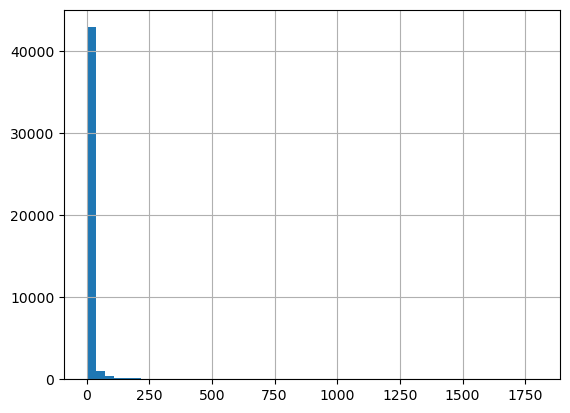

In [380]:
enters_and_exits_clean['duration_sec'] = enters_and_exits_clean['pageview_duration'].dt.seconds
enters_and_exits_clean['duration_sec'].hist(bins=50)

In [383]:
#how many page views have a duration of less than 1 second
len(enters_and_exits_clean[enters_and_exits_clean['duration_sec']==0])*100/len(enters_and_exits_clean)

30.282898499714022

In [377]:
enters_and_exits_clean['pageview_duration'].mean()

Timedelta('0 days 00:00:14.529420102')

In [427]:
duration_per_brochure = enters_and_exits_clean.groupby('brochure_id').agg({'duration_sec':sum,'page_num_array':'count','brochure_click_uuid':'nunique'}).reset_index()
duration_per_brochure['duration'] = duration_per_brochure['duration_sec']/duration_per_brochure['brochure_click_uuid']
duration_per_brochure['duration'].describe()

count     89.000000
mean      40.177939
std       42.461995
min        3.000000
25%       21.400000
50%       29.199541
75%       43.885714
max      295.000000
Name: duration, dtype: float64

In [423]:
duration_per_brochure

,brochure_id,duration_sec,page_num_array,brochure_click_uuid,duration
0,1609594235,589,87,19,31.000000
1,1609594236,260,18,4,65.000000
2,1609594237,1197,141,24,49.875000
3,1609594238,957,96,18,53.166667
4,1609594239,511,85,15,34.066667
...,...,...,...,...,...
84,1624605786,781,20,20,39.050000
85,1624605819,152,54,8,19.000000
86,1626126636,2088,36,36,58.000000
87,1626375062,208,11,11,18.909091


<Axes: >

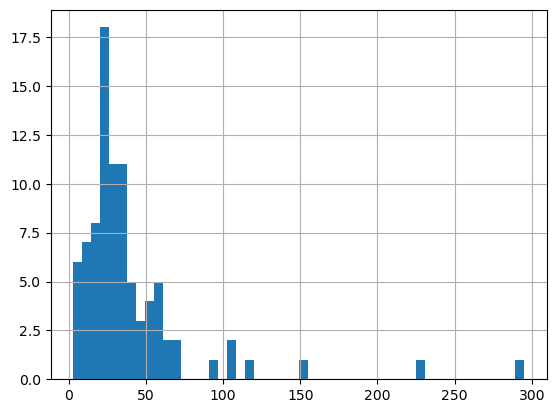

In [421]:
duration_per_brochure['duration'].hist(bins=50)

In [433]:
content = pd.read_csv("resources/content.csv")
content['brochure_id'] = content['brochure_id'].astype(str)

unique_brochures_duration = duration_per_brochure.merge(content, on='brochure_id',how='left').groupby(['title', 'pfrom', 'puntil', 'page_count', 'publisher_id', 'sector_name'])\
                                                                .agg({'duration_sec':sum,'brochure_click_uuid':sum}).reset_index()

unique_brochures_duration['avg_duration'] = unique_brochures_duration['duration_sec']/unique_brochures_duration['brochure_click_uuid']
unique_brochures_duration.sort_values('duration_sec',ascending=False)

,title,pfrom,puntil,page_count,publisher_id,sector_name,duration_sec,brochure_click_uuid,avg_duration
6,Aktuelle Angebote,2022-01-30,2022-02-05,1.0,220164,Supermärkte,349231,9067,38.516709
19,Top Angebote,2022-01-31,2022-02-05,9.0,1013,Discounter,155637,5255,29.616936
0,0% FINANZIERUNG,2022-01-25,2022-02-08,1.0,1065,Elektromärkte,45964,1888,24.345339
9,ENTDECKEN SIE UNSERE EIGENMARKEN!,2022-01-29,2022-02-02,2.0,220164,Supermärkte,13272,593,22.381113
17,Top Angebote,2022-01-29,2022-02-02,4.0,220164,Supermärkte,12768,402,31.761194
12,FÜR BEIDES ENTSCHEIDEN!,2022-01-30,2022-02-05,7.0,1065,Elektromärkte,12548,343,36.583090
5,Aktuelle Angebote,2022-01-30,2022-02-03,8.0,220164,Supermärkte,9710,193,50.310881
1,APPsolut sparsam!,2022-01-29,2022-02-02,5.0,220164,Supermärkte,8018,297,26.996633
25,Zusammen. Verführerisch. Gut.,2022-01-29,2022-02-02,2.0,220164,Supermärkte,4420,306,14.444444
21,WIR MACHEN ORDNUNG EINFACH,2022-01-29,2022-02-05,8.0,1042,Baumärkte,4198,83,50.578313


In [434]:
unique_brochures_duration.sort_values('avg_duration',ascending=False)

,title,pfrom,puntil,page_count,publisher_id,sector_name,duration_sec,brochure_click_uuid,avg_duration
22,WIR MACHEN ORDNUNG EINFACH,2022-01-31,2022-02-05,8.0,1042,Baumärkte,3469,34,102.029412
16,Top Angebote,2022-01-29,2022-02-02,1.0,220164,Supermärkte,1666,23,72.434783
15,SMARTES ANGEBOT!,2022-02-01,2022-02-15,1.0,1065,Elektromärkte,2088,36,58.000000
21,WIR MACHEN ORDNUNG EINFACH,2022-01-29,2022-02-05,8.0,1042,Baumärkte,4198,83,50.578313
5,Aktuelle Angebote,2022-01-30,2022-02-03,8.0,220164,Supermärkte,9710,193,50.310881
3,Aktuelle Angebote,2022-01-30,2022-02-03,4.0,220164,Supermärkte,3952,80,49.400000
7,Aktuelle Angebote,2022-01-31,2022-02-12,8.0,1024,Elektromärkte,3072,70,43.885714
4,Aktuelle Angebote,2022-01-30,2022-02-03,5.0,220164,Supermärkte,531,13,40.846154
6,Aktuelle Angebote,2022-01-30,2022-02-05,1.0,220164,Supermärkte,349231,9067,38.516709
12,FÜR BEIDES ENTSCHEIDEN!,2022-01-30,2022-02-05,7.0,1065,Elektromärkte,12548,343,36.583090


In [428]:
duration_per_brochure_page = enters_and_exits_clean.groupby(['brochure_id','page_num_array'])\
                                                .agg({'duration_sec':sum,'page_num_array':'count','brochure_click_uuid':'nunique'})\
                                                    .rename(columns={'page_num_array':'num_views'}).reset_index()

duration_per_brochure_page = duration_per_brochure_page.groupby('page_num_array').agg({'duration_sec':sum,'num_views':sum}).reset_index().sort_values('page_num_array')
duration_per_brochure_page['duration'] = np.round(duration_per_brochure_page['duration_sec']/duration_per_brochure_page['num_views'],2)
duration_per_brochure_page

,page_num_array,duration_sec,num_views,duration
0,1,496242,18621,26.65
1,2,33659,5045,6.67
2,3,28848,4169,6.92
3,4,21213,3899,5.44
4,5,13678,3394,4.03
5,6,16463,3125,5.27
6,7,10352,2794,3.71
7,8,8664,2378,3.64
8,9,8581,2033,4.22


In [410]:
duration_per_brochure_page

fig = go.Figure()

fig = px.scatter(duration_per_brochure_page, x="page_num_array", y="duration", title='Page view vs page position', text='duration', trendline="ols")\
     .update_layout(yaxis_title='Page view duration (s)', xaxis_title='Page position')

fig.update_traces(textposition="bottom right")

fig.show()

In [411]:
#correlation between page number and page view duration
r = np.corrcoef(duration_per_brochure_page['page_num_array'], duration_per_brochure_page['duration'])
r

array([[ 1.        , -0.65701197],
       [-0.65701197,  1.        ]])